In [53]:
from scipy.integrate import ode
import numpy as np
import matplotlib.pyplot as plt

y0, t0 = [0.0+0.0j, 1.0+0.0j], 0.0

def f(t, y, K, L, M):
    return [K*y[0] + L*y[1], L*y[0]+M*y[1]]
def jac(t, y, K, L, M):
    return [[K, L], [L, M]]

wc = - 1.0j * 1000.
g = - 1.0j *  1.
wx = - 1.0j * 1005.

r = ode(f, jac).set_integrator('zvode', method='adams', with_jacobian=True, rtol=1e-16)
r.set_initial_value(y0, t0).set_f_params(wc, g, wx).set_jac_params(wc, g, wx)
t1 = 20.
dt = 0.001

C1 = [np.abs(np.power(y0[0],2))]
C2 = [np.abs(np.power(y0[1],2))]

print(C1,C2)

while r.successful() and r.t < t1:
    r.integrate(r.t+dt)
    #print("{}, {}".format(r.t, r.y))
    C1.append(np.abs(r.y[0]**2))
    C2.append(np.abs(r.y[1]**2))

[0.0] [1.0]


In [5]:
print(C1)
print(C2)

[0.0, 9.999999997150292e-11, 3.999999996035193e-10, 9.000000015759792e-10, 1.6000000029862445e-09, 2.5000000143736694e-09, 3.6000000226255396e-09, 4.900000128391695e-09, 6.40000039720619e-09, 8.100000706629254e-09, 1.0000000840941323e-08, 1.2100001341385773e-08, 1.440000222151048e-08, 1.6900002986135037e-08, 1.9600003287741785e-08, 2.2500004259429384e-08, 2.5600005732285645e-08, 2.8900006761677526e-08, 3.2400006766579886e-08, 3.610000667088294e-08, 4.00000064754486e-08, 4.4100006172805865e-08, 4.840000575400999e-08, 5.290000520573997e-08, 5.760000450558801e-08, 6.250000361661573e-08, 6.760000253574423e-08, 7.290000127140376e-08, 7.839999982222928e-08, 8.409999818607413e-08, 8.999999635491388e-08, 9.609999430702461e-08, 1.0239999199581117e-07, 1.0889998935595497e-07, 1.1559998642250601e-07, 1.224999832082783e-07, 1.2959997971487582e-07, 1.3689997593621988e-07, 1.443999718482147e-07, 1.5209996739430438e-07, 1.5999996246616768e-07, 1.6809995699344016e-07, 1.7639995107299235e-07, 1.8489994

In [54]:
tf = np.arange(t0,t1+dt,dt)
#tf = np.arange(t0,2803,dt*100)
Traza = [C1[j]+C2[j] for j in range(len(C1))]

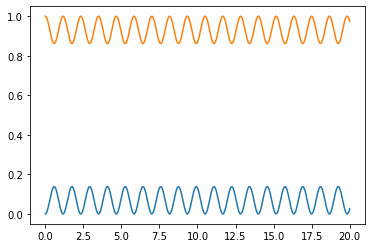

In [59]:
plt.plot(tf, C1)
plt.plot(tf, C2)
plt.show()


(0, 1.05)

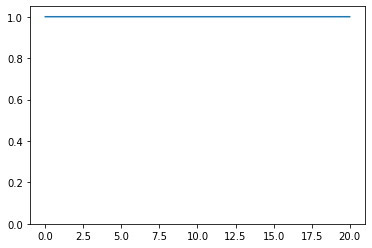

In [60]:
plt.plot(tf, Traza)
plt.ylim([0,1.05])


In [ ]:
print(len(tf))
print(len(C1))